# Hard SVM Implementation for Determining Credit Card Fraud.

Dataset: [Kaggle-Credit Card Fraud Dataset](https://paperswithcode.com/dataset/kaggle-credit-card-fraud-dataset)

_Data has already undergone PCA and preprocessing to anonymize the data._

The original classes for the data are:

* Fraudulent Transaction: _+1_

* Non-fraudulent Transaction: _0_

In [3]:
!pip install scikit-learn
!pip install seaborn



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\DaneShuler\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     -------------- ----------------------- 112.6/294.9 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\DaneShuler\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

Load and modify the class values for SVM.

The modified classes for the data are:

* Fraudulent Transaction: _+1_

* Non-fraudulent Transaction: _-1_

In [8]:
data = pd.read_csv("creditcard.csv")

data["Class"] = np.where(data["Class"] <= 0, -1, 1)

data.shape

(284807, 31)

Preview the data

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,-1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,-1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-1


## Split the Data for Training and Testing

In [10]:

from sklearn.model_selection import train_test_split
X = data.drop("Class", axis=1).to_numpy()
y = data["Class"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the Data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Hard SVM Loss Function

In [12]:
def hard_hinge_loss(X, y, weights, bias):
    distances = 1 - y * (np.dot(X, weights) + bias)
    distances = np.maximum(0, distances)  # Only count violations
    return 0.5 * np.dot(weights, weights) + np.sum(distances)


## Hard SVM Training (Gradient Descent)

In [14]:
def fit_hard_svm(X, y, lr=0.001, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(epochs):
        for i in range(n_samples):
            condition = y[i] * (np.dot(X[i], weights) + bias) >= 1
            if condition:
                dw = weights
                db = 0
            else:
                dw = weights - y[i] * X[i]
                db = -y[i]
            weights -= lr * dw
            bias -= lr * db

        # Optional: print loss every 100 epochs
        if epoch % 100 == 0:
            loss = hard_hinge_loss(X, y, weights, bias)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias


## Predict Function

In [15]:
def predict(X, weights, bias):
    return np.sign(np.dot(X, weights) + bias)


## Testing

In [16]:
weights, bias = fit_hard_svm(X_train, y_train, lr=0.0001, epochs=1000)
y_pred = predict(X_test, weights, bias)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Epoch 0, Loss: 668.7092
Epoch 100, Loss: 668.8044
Epoch 200, Loss: 668.5833
Epoch 300, Loss: 668.5504
Epoch 400, Loss: 668.9870
Epoch 500, Loss: 669.2339
Epoch 600, Loss: 668.8643
Epoch 700, Loss: 668.7917
Epoch 800, Loss: 668.5503
Epoch 900, Loss: 668.9616
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9983


C:\Users\DaneShuler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DaneShuler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DaneShuler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metric

## Visual

C:\Users\DaneShuler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


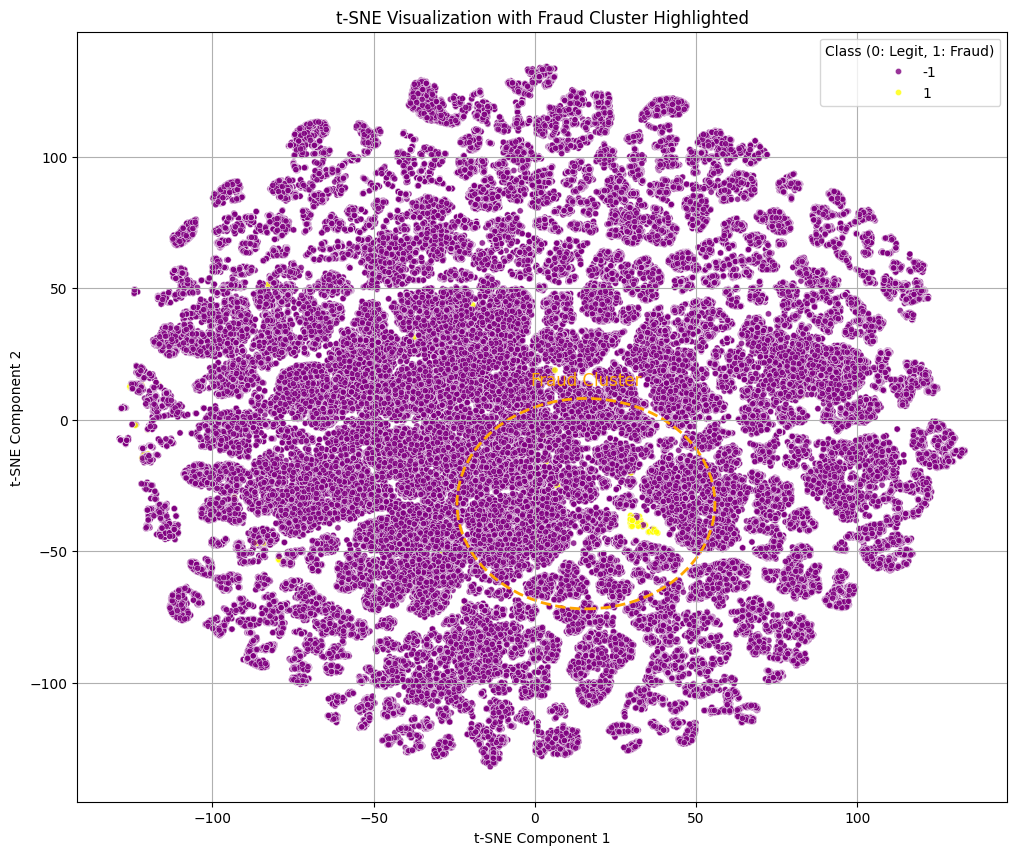

In [17]:
# Combine scaled train/test data for t-SNE visualization
X_all = np.vstack((X_train, X_test))
y_all = np.concatenate((y_train, y_test))

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1000)
X_embedded = tsne.fit_transform(X_all)

# Prepare dataframe
tsne_df = pd.DataFrame({
    't-SNE-1': X_embedded[:, 0],
    't-SNE-2': X_embedded[:, 1],
    'Class': y_all
})

# Create plot
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='t-SNE-1', y='t-SNE-2',
    hue='Class',
    palette={-1: 'purple', 1: 'yellow'},
    data=tsne_df,
    alpha=0.8,
    s=20
)

# Circle the fraud cluster region manually
fraud_points = tsne_df[tsne_df['Class'] == 1]
x_center = fraud_points['t-SNE-1'].mean()
y_center = fraud_points['t-SNE-2'].mean()
radius = 40  # You can adjust this

circle = plt.Circle((x_center, y_center), radius, color='orange', fill=False, linewidth=2, linestyle='--')
plt.gca().add_patch(circle)
plt.text(x_center, y_center + radius + 5, 'Fraud Cluster', ha='center', color='orange', fontsize=12)

# Final touches
plt.title('t-SNE Visualization with Fraud Cluster Highlighted')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class (0: Legit, 1: Fraud)')
plt.grid(True)
plt.show()